<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
customers.columns   # se observan las columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
customers['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [7]:
customers['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

**Your observations here**

+ 
+ 
+ 
+ 



In [8]:
customers.shape

(440, 8)

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
# No hay nulos, debuti

In [11]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


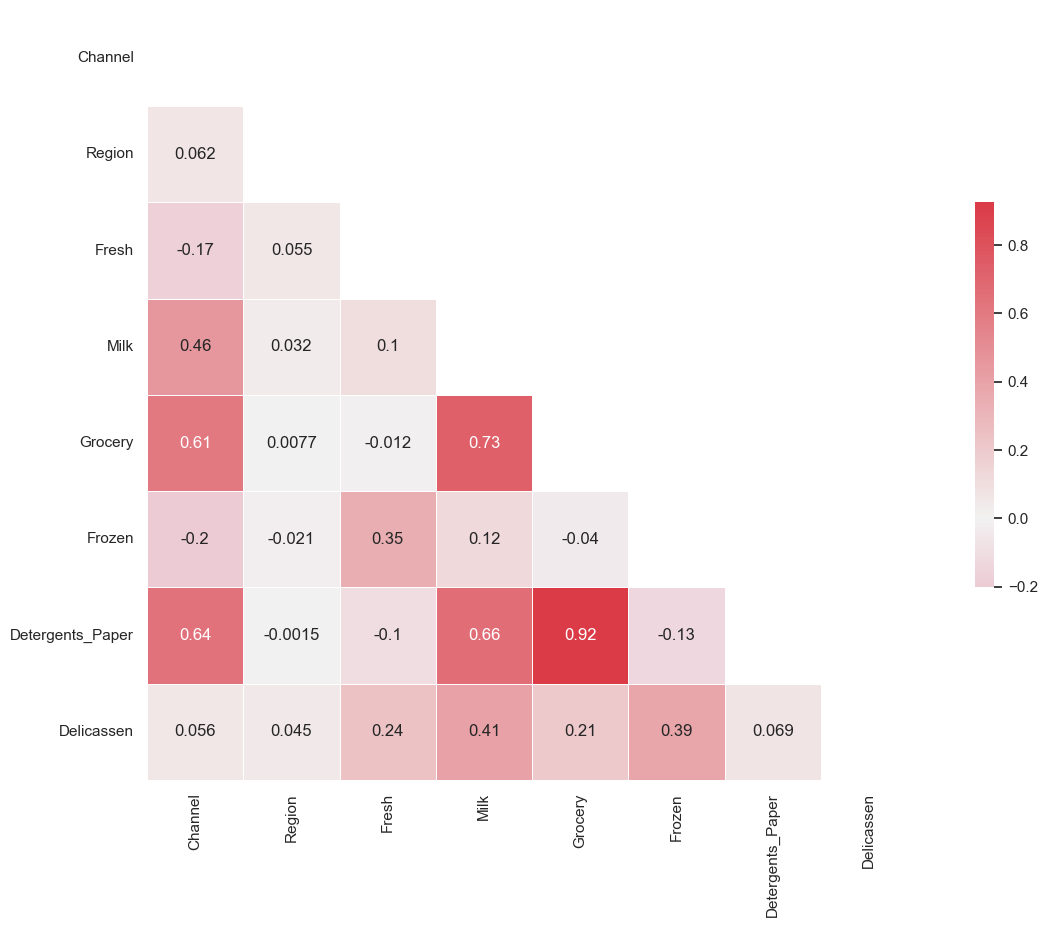

In [12]:
def plot_correlation_heatmap(df):
    numeric_columns = df.select_dtypes(include=np.number)

    plt.figure(figsize=(15, 10))
    sns.set(style='white')

    mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
    cmap = sns.diverging_palette(0, 10, as_cmap=True)

    sns.heatmap(numeric_columns.corr(),
                mask=mask,
                cmap=cmap,
                center=0,
                square=True,
                annot=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})

    plt.show()

plot_correlation_heatmap(customers)

<function matplotlib.pyplot.show(close=None, block=None)>

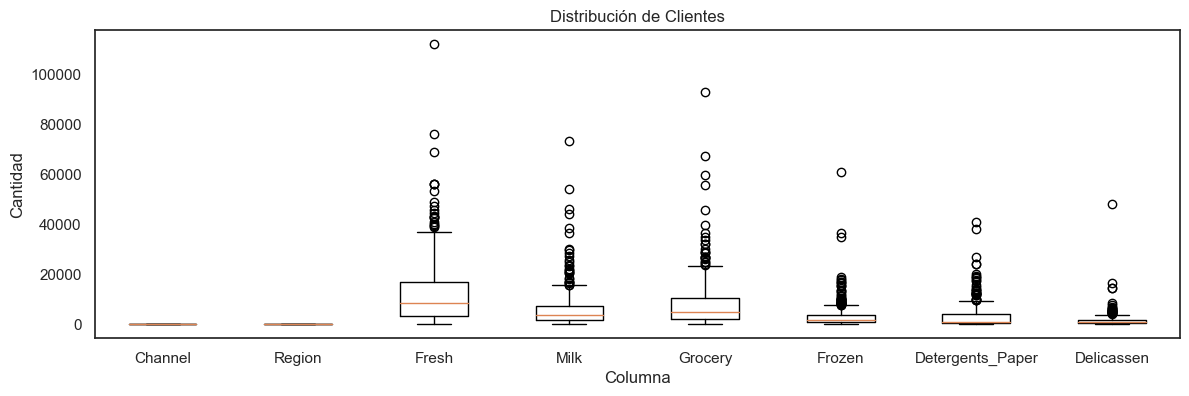

In [13]:
fig = plt.figure(figsize=(14, 4))

plt.boxplot(customers)

plt.title('Distribución de Clientes')
plt.xlabel('Columna')
plt.ylabel('Cantidad')

column_names = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
plt.xticks(range(1, len(column_names) + 1), column_names)

plt.show

In [14]:
customers.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [15]:
# Q1 = customers.quantile(0.25)
# Q3 = customers.quantile(0.75)
# IQR = Q3 - Q1

# factor = 3
# upper_limit = Q3 + factor * IQR
# lower_limit = Q1 - factor * IQR

# cusf = customers[(customers['Columna'] >= lower_limit) & (customers['Columna'] <= upper_limit)]

**Your comment here**

+ 
+ 
+ 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cus_scaled = scaler.fit_transform(customers)

cus_scaled = pd.DataFrame(cus_scaled, columns=customers.columns)
cus_scaled.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

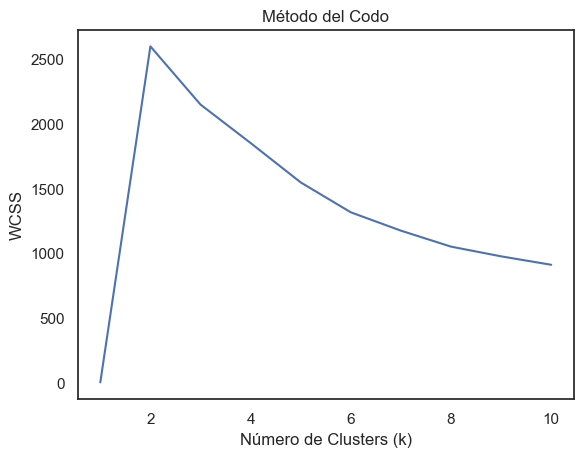

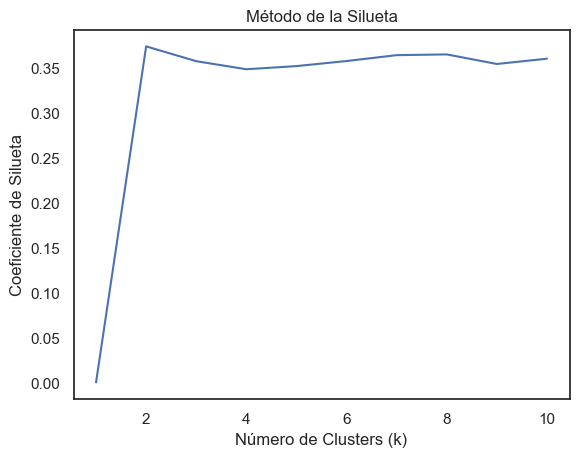

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for k in range(1, 11):

    if k == 1:
        
        labels = np.zeros(len(cus_scaled))
        wcss.append(0)
        silhouette_scores.append(0)
    
    else:
    
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(cus_scaled)
        
        wcss.append(kmeans.inertia_)
        
        silhouette_avg = silhouette_score(cus_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# codo
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.show()

# siluet
plt.plot(range(1, 11), silhouette_scores)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método de la Silueta')
plt.show()

C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

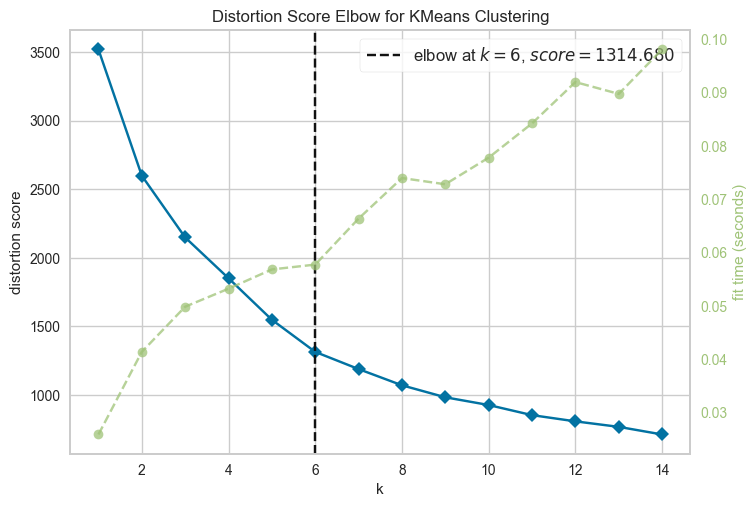

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster, datasets

modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))

visual.fit(cus_scaled)

visual.poof()

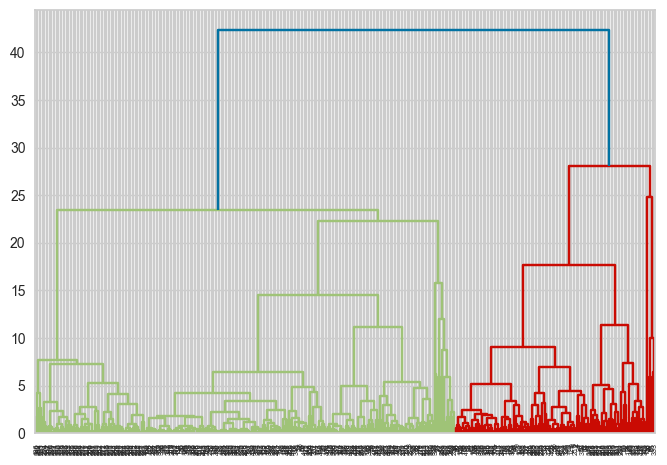

<Figure size 1400x800 with 0 Axes>

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(cus_scaled, method='ward')
dendrogram(Z)

plt.figure(figsize=(14, 8))


plt.show()

Como vemos en los gráficos los cluster no son nada claros en ninguno de los tres métodos.

Resumen que veo:

- Con codo/cluster a primera vista parecía un claro 2 u 8.
- Con codo/silueta ml saca el 6, no me queda claro por qué la vdd pero habrá que probarlo.
- Con dendograma parece un claster 2 pseudoclarísimo.

Vamos a probar 2, 6 y 8 en gráfico pues a ver qué pasa. Elegimos las columnas que más correlación tenían.

Count the values in `labels`.

C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


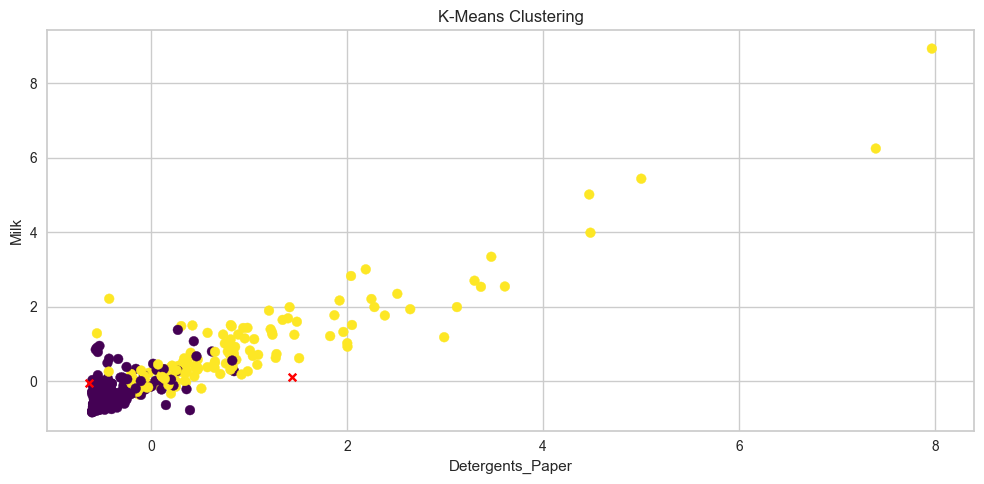

In [20]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(cus_scaled)


labels = kmeans.labels_

centroids = kmeans.cluster_centers_
cus_scaled['labels2'] = labels


fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels2'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('K-Means Clustering')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=30)

plt.tight_layout()
plt.show()

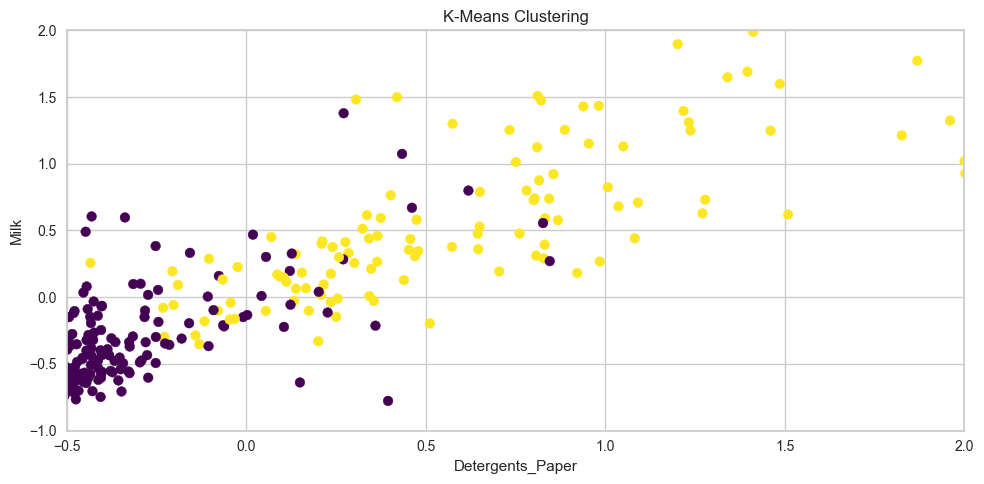

In [21]:
fig, ax = plt.subplots(figsize=(10,5))


ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels2'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('K-Means Clustering')

ax.set_xlim(-0.5, 2)
ax.set_ylim(-1, 2)

# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=30)

plt.tight_layout()
plt.show()

No veo gran cosa la vdd, está todo bastante apelotonado

C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


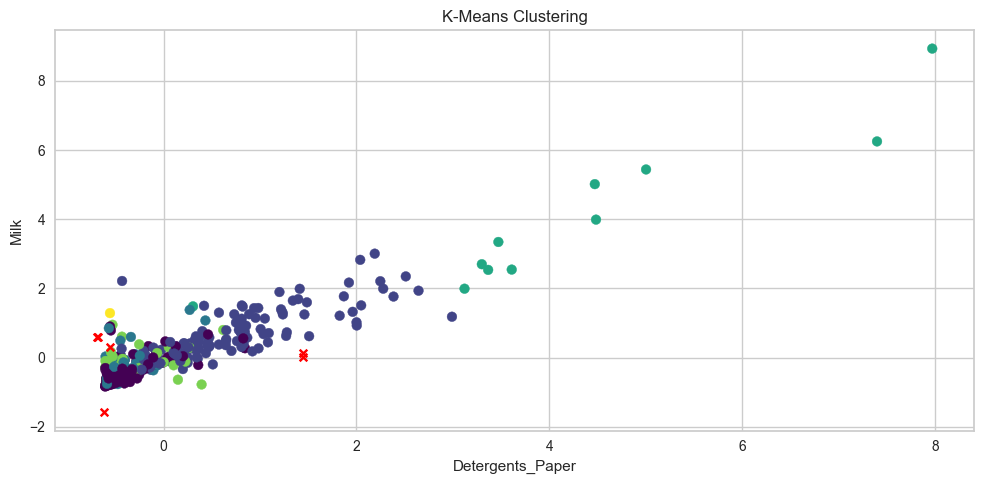

In [22]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(cus_scaled)


labels = kmeans.labels_

centroids = kmeans.cluster_centers_
cus_scaled['labels6'] = labels


fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels6'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('K-Means Clustering')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=30)

plt.tight_layout()
plt.show()

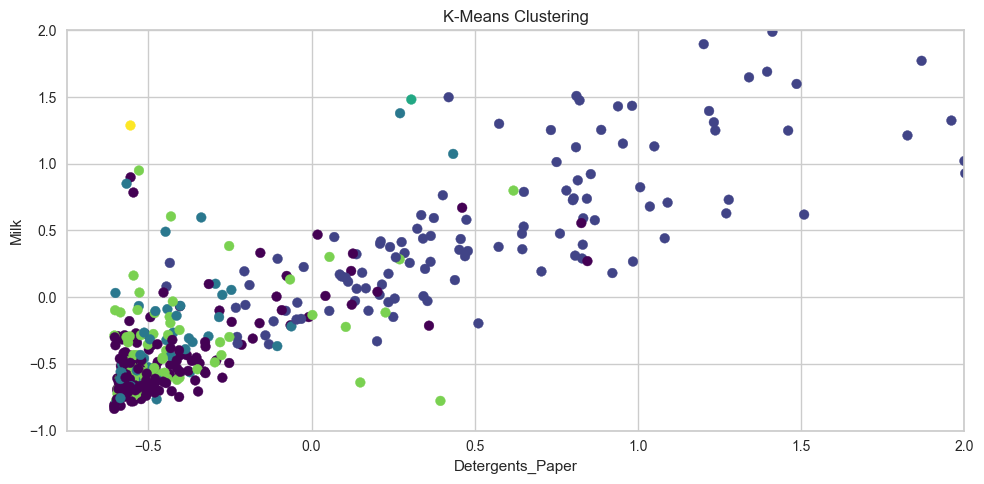

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels6'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('K-Means Clustering')

ax.set_xlim(-0.75, 2)
ax.set_ylim(-1, 2)


# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=30)

plt.tight_layout()
plt.show()

Hacemos el zoom para ver si en el montón del principio se diferencian más los grupos pero no mucho.

C:\Users\Nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


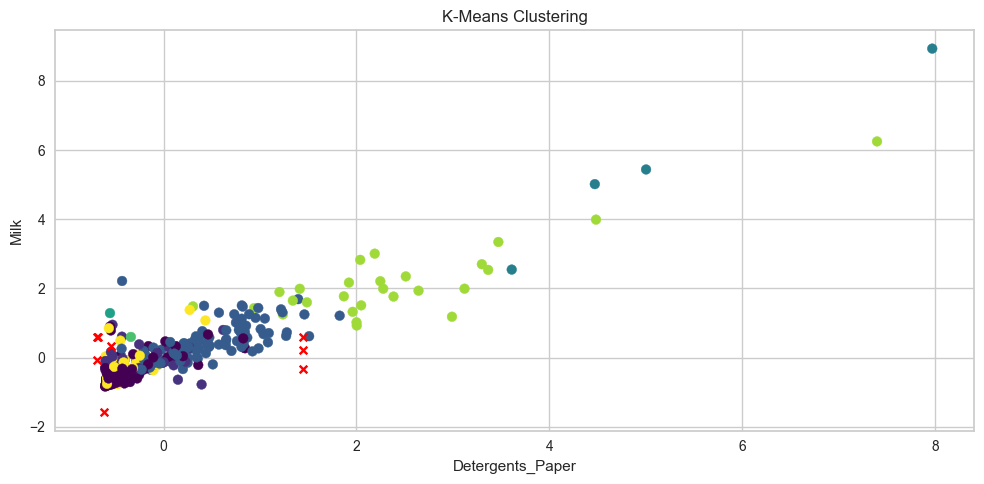

In [24]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(cus_scaled)


labels = kmeans.labels_

centroids = kmeans.cluster_centers_
cus_scaled['labels8'] = labels


fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels8'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('K-Means Clustering')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=30)

plt.tight_layout()
plt.show()

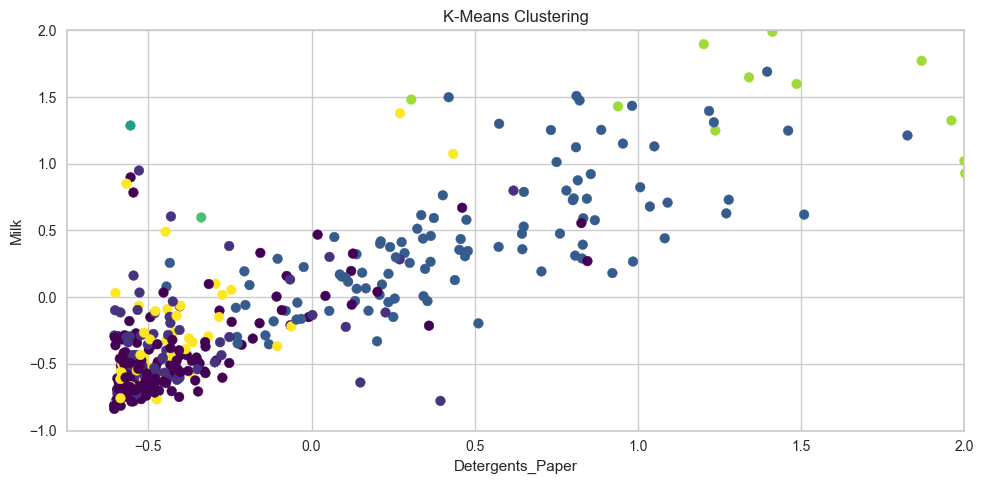

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels8'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('K-Means Clustering')

ax.set_xlim(-0.75, 2)
ax.set_ylim(-1, 2)

# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=30)

plt.tight_layout()
plt.show()


en este todavía se ve menos nada, los centroides tp se identifican mucho con su grupo

En ppio parece que 2 es el mas accurate

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

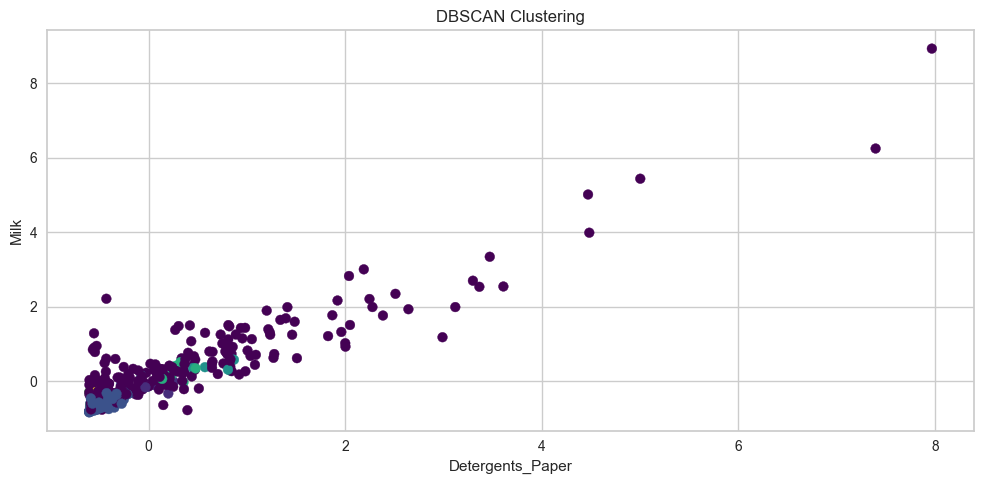

In [26]:
# Your code here
from sklearn.cluster import DBSCAN 

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
data = dbscan.fit(cus_scaled)

cus_scaled['labels_DBSCAN'] = data.labels_

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels_DBSCAN'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

Count the values in `labels_DBSCAN`.

In [27]:
cus_scaled['labels_DBSCAN'].value_counts()


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

In [28]:
len(cus_scaled['labels_DBSCAN'].value_counts().index)    #cuantos clusters ha hecho

9

Ahora DBSCAN le ha gustado 9 que nada tiene que ver con KMEANS (?), seguimos en dudas

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

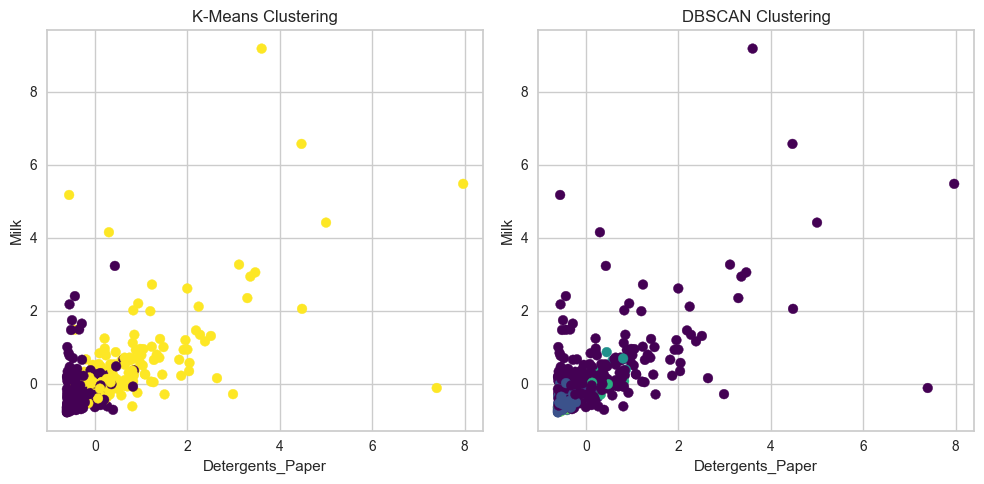

In [31]:

fig, ax = plt.subplots(1, 2, figsize=(10,5))

# K-Means
ax[0].scatter(cus_scaled['Detergents_Paper'], cus_scaled['Milk'], c=cus_scaled['labels2'], cmap='viridis')
ax[0].set_xlabel('Detergents_Paper')
ax[0].set_ylabel('Milk')
ax[0].set_title('K-Means Clustering')

# DBSCAN 

color_map = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'purple', 5: 'yellow', 6: 'cyan', 7: 'magenta', 8: 'lime'}

ax[1].scatter(cus_scaled['Detergents_Paper'], cus_scaled['Milk'], c=cus_scaled['labels_DBSCAN'], cmap='viridis')
ax[1].set_xlabel('Detergents_Paper')
ax[1].set_ylabel('Milk')
ax[1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

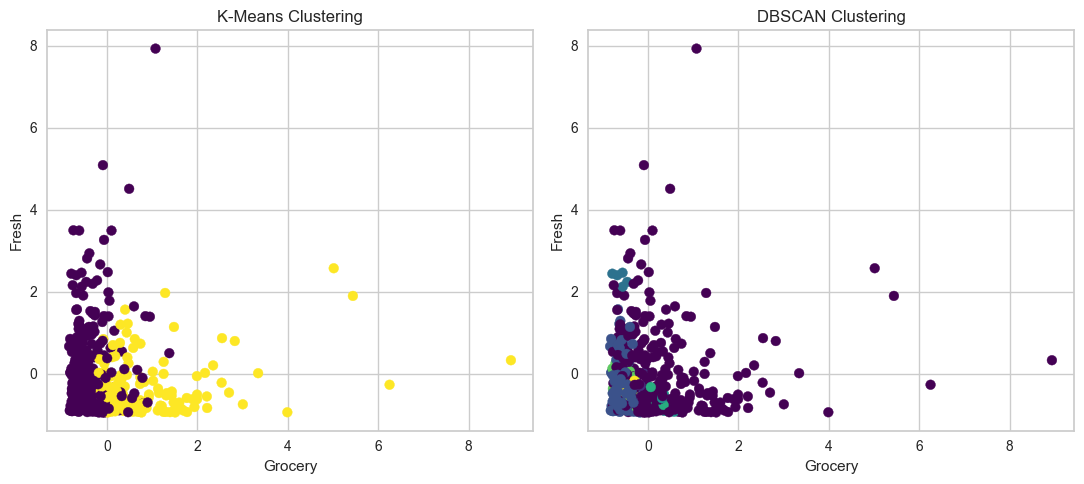

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(11,5))

# K-Means
ax[0].scatter(cus_scaled['Grocery'], cus_scaled['Fresh'], c=cus_scaled['labels2'], cmap='viridis')
ax[0].set_xlabel('Grocery')
ax[0].set_ylabel('Fresh')
ax[0].set_title('K-Means Clustering')

# DBSCAN 

ax[1].scatter(cus_scaled['Grocery'], cus_scaled['Fresh'], c=cus_scaled['labels_DBSCAN'], cmap='viridis')
ax[1].set_xlabel('Grocery')
ax[1].set_ylabel('Fresh')
ax[1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show();

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

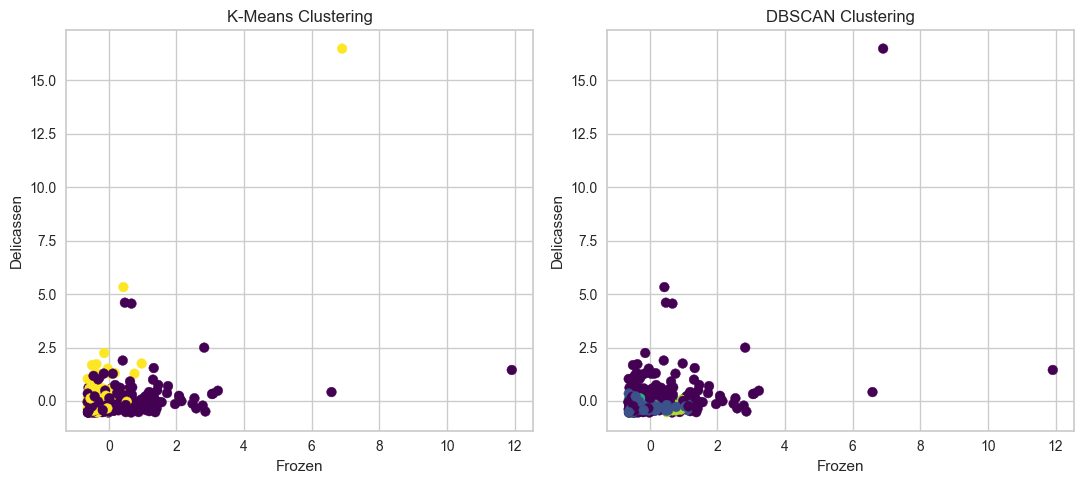

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(11,5))

# K-Means
ax[0].scatter(cus_scaled['Frozen'], cus_scaled['Delicassen'], c=cus_scaled['labels2'], cmap='viridis')
ax[0].set_xlabel('Frozen')
ax[0].set_ylabel('Delicassen')
ax[0].set_title('K-Means Clustering')

# DBSCAN 

ax[1].scatter(cus_scaled['Frozen'], cus_scaled['Delicassen'], c=cus_scaled['labels_DBSCAN'], cmap='viridis')
ax[1].set_xlabel('Frozen')
ax[1].set_ylabel('Delicassen')
ax[1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show();

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [48]:
cus_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels2,labels6,labels8,labels_DBSCAN
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1,1,2,-1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1,1,2,-1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1,1,2,-1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0,0,0,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1,1,2,-1


<function matplotlib.pyplot.show(close=None, block=None)>

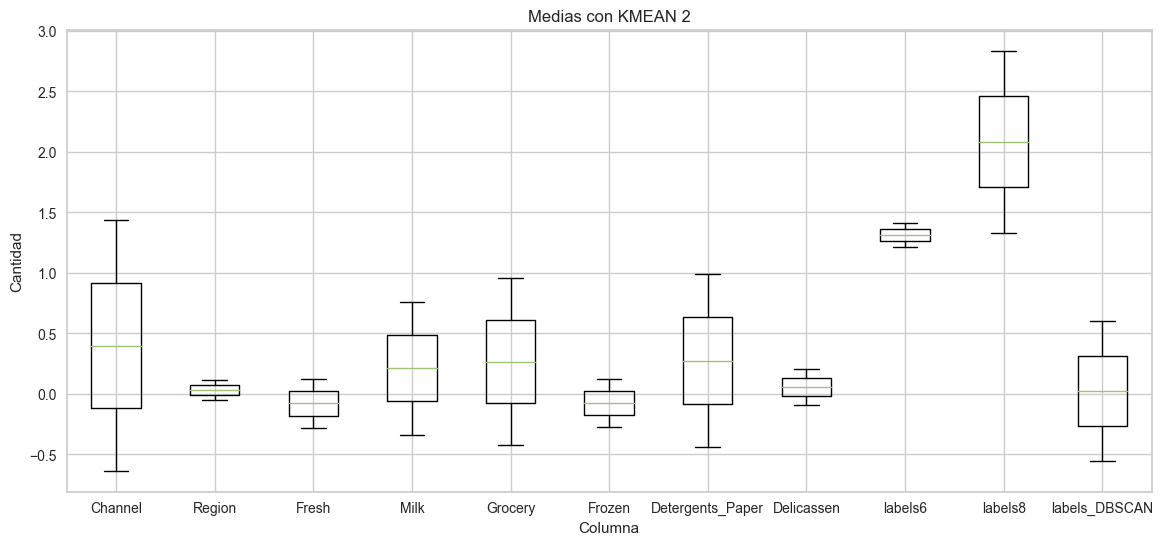

In [54]:
lk = cus_scaled.groupby('labels2').mean()
fig = plt.figure(figsize=(14, 6))

plt.boxplot(lk)

plt.title('Medias con KMEAN 2')
plt.xlabel('Columna')
plt.ylabel('Cantidad')

column_names = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'labels6', 'labels8', 'labels_DBSCAN']
plt.xticks(range(1, len(column_names) + 1), column_names)

plt.show

In [49]:
lk.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels6,labels8,labels_DBSCAN
labels2,,,,,,,,,,,
0,-0.634194,-0.049475,0.124700,-0.336120,-0.422167,0.122722,-0.437307,-0.091677,1.409836,1.331148,0.603279
1,1.432808,0.111777,-0.281729,0.759382,0.953785,-0.277261,0.987989,0.207122,1.214815,2.837037,-0.555556


<function matplotlib.pyplot.show(close=None, block=None)>

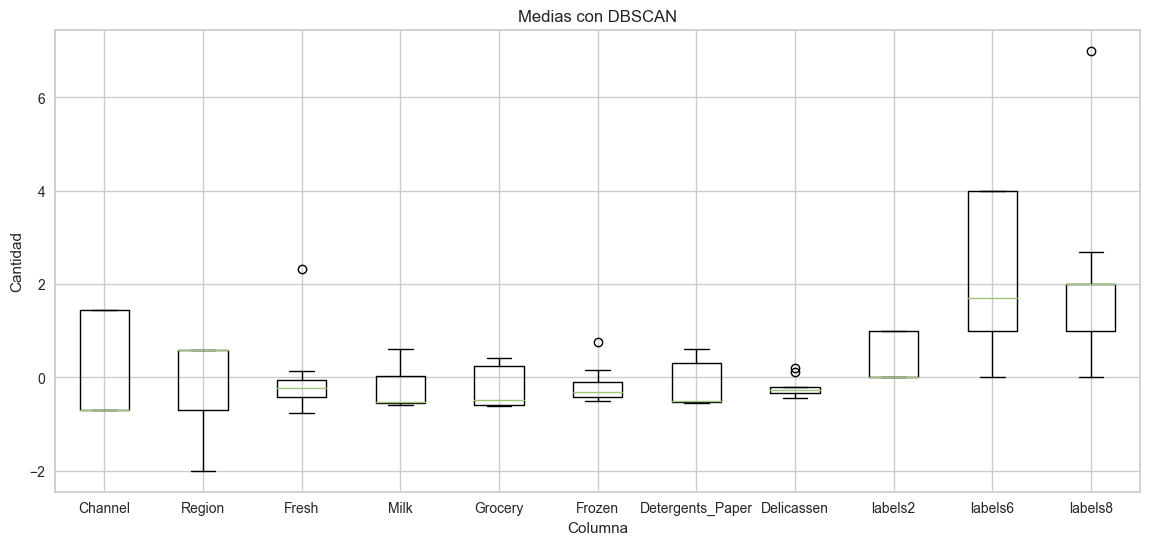

In [55]:
ld = cus_scaled.groupby('labels_DBSCAN').mean()
fig = plt.figure(figsize=(14, 6))
plt.boxplot(ld)

plt.title('Medias con DBSCAN')
plt.xlabel('Columna')
plt.ylabel('Cantidad')

column_names = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'labels2', 'labels6', 'labels8']
plt.xticks(range(1, len(column_names) + 1), column_names)

plt.show

Which algorithm appears to perform better?

Aquí no está nada muy claro. Por los gráficos parece que KMEANS con cluster 2 es más fiable proque los grupos están algo más diferenciados pero tampoco mucho. Por otro lado, al revisarlos con las medias DDSCAN tiene los cuartiles más juntos y menos dispersos por lo que podría parecer que es más óptimo, aunque KMEAN tiene las distribuciones en las columnas más simétricas y sin outliers por lo que puede indicar que tiene más diversidad es más concentrado, cosa buena porque significa que los ha agrupado relativamente ok.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [56]:
# lo hice arribita

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

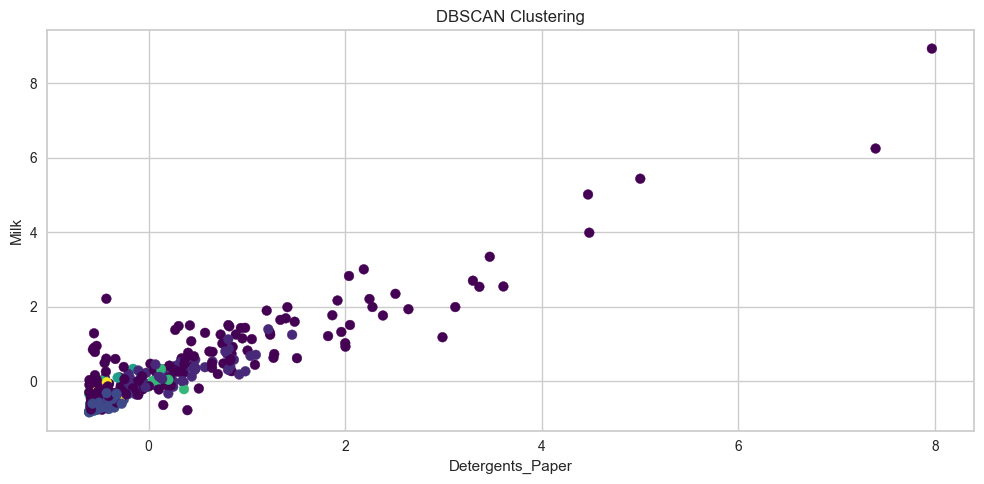

10

In [67]:
dbscan = DBSCAN(eps=0.7, min_samples=7)
data = dbscan.fit(cus_scaled)

cus_scaled['labels_DBSCAN'] = data.labels_

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels_DBSCAN'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

len(cus_scaled['labels_DBSCAN'].value_counts().index)    

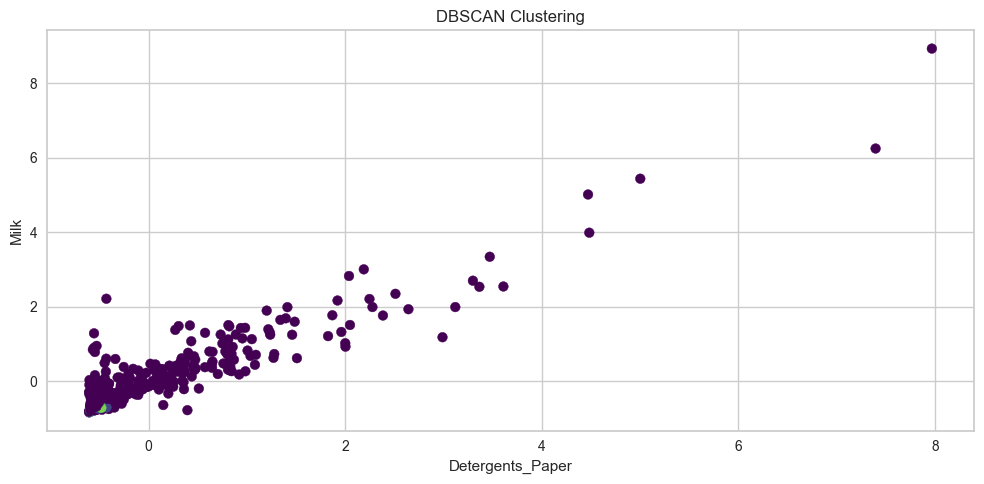

6

In [68]:
dbscan = DBSCAN(eps=0.25, min_samples=5)
data = dbscan.fit(cus_scaled)

cus_scaled['labels_DBSCAN'] = data.labels_

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels_DBSCAN'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

len(cus_scaled['labels_DBSCAN'].value_counts().index) 

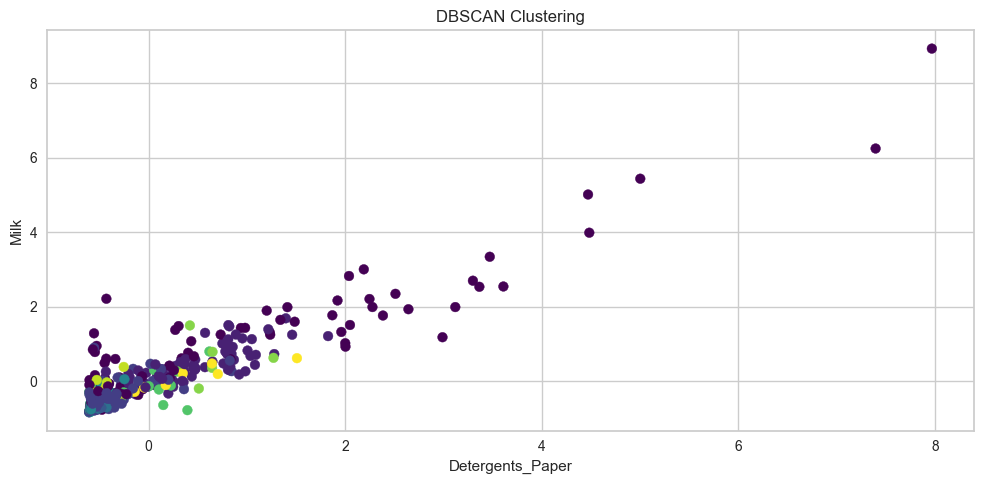

12

In [69]:
dbscan = DBSCAN(eps=1, min_samples=5)
data = dbscan.fit(cus_scaled)

cus_scaled['labels_DBSCAN'] = data.labels_

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(cus_scaled['Detergents_Paper'], cus_scaled['Grocery'], c=cus_scaled['labels_DBSCAN'], cmap='viridis')
ax.set_xlabel('Detergents_Paper')
ax.set_ylabel('Milk')
ax.set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

len(cus_scaled['labels_DBSCAN'].value_counts().index) 

**Your comment here**

+ Eps
  + Menor: la agrupación es menor porque coge puntos en menor distancia.
  + Mayor: hace grupos más amplios, recoge todos los que estén en la distancia marcada.
+ Min samples
  + Menor: crea grupos más peques y excluye outliers, por lo que en este caso no es el más util.
  + Mayor: pide más puntos cerca del 'pseudocentroide' así que recoge mas puntos ruidosos. 
